## Setup

In [218]:
import pandas as pd
import matplotlib.pyplot as plt

## Limpeza inicial

Começaremos realizando a leitura do arquivo, utilizando a biblioteca `pandas`.

In [219]:
# Arquivo retirado de https://www.kaggle.com/datasets/realkiller69/gaia-stars-dataset-from-dr3-data-release-3
nome_arquivo = "C:\\Users\\Marcelo\\Downloads\\dataGaia2.csv"
df = pd.read_csv(nome_arquivo)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626016 entries, 0 to 626015
Data columns (total 50 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  626016 non-null  int64  
 1   RA_ICRS     626016 non-null  float64
 2   DE_ICRS     626016 non-null  float64
 3   Source      626016 non-null  int64  
 4   e_RA_ICRS   626016 non-null  float64
 5   e_DE_ICRS   626016 non-null  float64
 6   Plx         626016 non-null  float64
 7   e_Plx       626016 non-null  float64
 8   PM          626016 non-null  float64
 9   pmRA        626016 non-null  float64
 10  e_pmRA      626016 non-null  float64
 11  pmDE        626016 non-null  float64
 12  e_pmDE      626016 non-null  float64
 13  RUWE        626016 non-null  float64
 14  Gmag        626015 non-null  float64
 15  e_Gmag      626015 non-null  float64
 16  BPmag       626015 non-null  float64
 17  e_BPmag     626015 non-null  float64
 18  RPmag       626016 non-null  float64
 19  e_

O arquivo inicial possui mais de 230 MB. Para reduzir o espaço utilizado, assim como a memória, iniciaremos removendo algumas colunas.

In [220]:
# Seleção de colunas relevantes
colunas = [
    "E(BP-RP)",    # cor da estrela
    "GMAG",        # magnitude absoluta
    "Teff",        # temperatura efetiva
    "Dist",        # distância
    "SpType-ELS",  # classe espectral
    "Lum-Flame",   # luminosidade
    "Mass-Flame",  # massa
    "Age-Flame",   # idade
    "Rad",         # raio da estrela
    "PWD",         # probabilidade de ser uma anã branca
    "Pstar"        # probabilidade de ser uma estrela
]

df = df[colunas]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626016 entries, 0 to 626015
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   E(BP-RP)    626016 non-null  float64
 1   GMAG        626016 non-null  float64
 2   Teff        626016 non-null  float64
 3   Dist        626016 non-null  float64
 4   SpType-ELS  626016 non-null  object 
 5   Lum-Flame   611293 non-null  float64
 6   Mass-Flame  590796 non-null  float64
 7   Age-Flame   544681 non-null  float64
 8   Rad         626016 non-null  float64
 9   PWD         626016 non-null  float64
 10  Pstar       626016 non-null  float64
dtypes: float64(10), object(1)
memory usage: 52.5+ MB


In [221]:
df.describe()

,E(BP-RP),GMAG,Teff,Dist,Lum-Flame,Mass-Flame,Age-Flame,Rad,PWD,Pstar
count,626016.000000,626016.000000,626016.000000,626016.000000,611293.000000,590796.000000,544681.000000,626016.000000,626016.000000,626016.000000
mean,0.624461,2.232897,7295.083343,2150.402903,114.628554,1.841872,3.776435,8.030661,0.010132,0.971183
std,0.598200,2.697246,3769.970693,3216.573066,330.115307,1.004918,4.139873,27.666678,0.099455,0.166293
min,0.000000,-7.961700,3039.229700,10.519300,0.034732,0.500000,0.200000,0.345400,0.000000,0.000001
25%,0.219600,0.340400,5217.454250,586.924225,2.066952,1.041000,0.524000,1.345000,0.000000,0.999915
50%,0.417200,1.979300,5957.607200,1104.667850,11.679550,1.649000,1.448000,2.056100,0.000000,0.999976
75%,0.877200,3.919600,8391.984000,2607.726875,60.254990,2.462000,6.629000,4.007600,0.000000,0.999995
max,4.116100,9.963000,41504.020000,35666.805000,3499.921000,7.521000,13.500000,1105.995600,0.999950,1.000000


Note que existem linhas com os valores `SpType-ELS`, `Lum-Flame` e `Mass-Flame` vazios. 

Como o dataset possui centenas de milhares de objetos, e a remoção de dados não deve prejudicar a análise, inicialmente as linhas com dados incompletos podem ser removidas. Porém, há um viés que será observado posteriormente para as anãs brancas, e por isso, a remoção não será realizada.

A fim de reduzir o tamanho do arquivo e reduzir o tempo necessário para as análises, será utilizado um subconjunto dos dados filtrados, escolhido aleatoriamente.

In [232]:
df_sample = df.sample(n=67000, random_state=67)
df_sample.describe()

,E(BP-RP),GMAG,Teff,Dist,Lum-Flame,Mass-Flame,Age-Flame,Rad,PWD,Pstar
count,67000.000000,67000.000000,67000.000000,67000.000000,65458.000000,63322.000000,58567.000000,67000.000000,67000.000000,67000.000000
mean,0.619735,2.240357,7265.964198,2129.641085,113.799303,1.833125,3.775822,8.103059,0.009858,0.972038
std,0.591785,2.692937,3715.998258,3175.800499,330.318690,0.995764,4.135098,27.753922,0.098110,0.163892
min,0.000000,-7.961700,3272.313500,20.905100,0.035129,0.500000,0.200000,0.387200,0.000000,0.000001
25%,0.220100,0.358675,5221.738150,584.219250,2.068698,1.042000,0.529000,1.344100,0.000000,0.999916
50%,0.415200,2.002850,5955.036900,1097.238250,11.465639,1.642000,1.449000,2.054200,0.000000,0.999976
75%,0.868425,3.920875,8280.396000,2582.629175,58.859737,2.450000,6.587500,3.982750,0.000000,0.999994
max,4.057200,9.240500,41126.695000,34134.992000,3488.932000,7.407000,13.499000,1105.995600,0.999950,1.000000


Abaixo, é possível observar que as candidatas a serem anãs brancas no sample não possuem estimativas de idade (`Age-Flame`), e mesmo estimativas de massa não são tão frequentes. Por isso, descartar linhas incompletas pode distorcer o dataset original, assim justificando mantê-las.

In [233]:
df_wa = df_sample[df_sample['PWD'] > 0.9]
df_wa.describe()

,E(BP-RP),GMAG,Teff,Dist,Lum-Flame,Mass-Flame,Age-Flame,Rad,PWD,Pstar
count,642.000000,642.000000,642.000000,642.000000,357.000000,34.000000,0.0,642.000000,642.000000,642.000000
mean,0.217412,-0.596890,20329.986682,17752.779041,420.389533,6.238147,NaN,3.011324,0.997325,0.000052
std,0.255502,1.541203,5012.857749,7640.344540,563.837709,0.780837,NaN,3.415496,0.011440,0.000010
min,0.000000,-6.559900,9994.753000,916.334500,0.372466,4.098000,NaN,0.949300,0.900039,0.000050
25%,0.002200,-1.706075,16894.750500,13437.569000,117.080850,5.953000,NaN,1.644650,0.999948,0.000050
50%,0.098100,-0.113700,19416.910000,18259.638500,246.328220,6.447000,NaN,1.956400,0.999949,0.000050
75%,0.397825,0.514600,22161.775250,23086.853750,490.662300,6.741250,NaN,3.230625,0.999950,0.000050
max,1.014800,2.775800,37659.895000,34134.992000,3452.369900,7.228000,NaN,39.834400,0.999950,0.000143


## Diagrama HR inicial

Com base nos dados de temperatura efetiva (`Teff`) e luminosidade (relacionada à magnitude absoluta `GMAG`), podemos criar uma primeira versão para o diagrama HR.

Como o valor de magnitude absoluta é menor para estrelas mais luminosas, é necessário inverter o eixo Y. O mesmo ocorre para a temperatura efetiva, geralmente apresentada de forma decrescente no diagrama, gerando a necessidade de inverter também o eixo X.

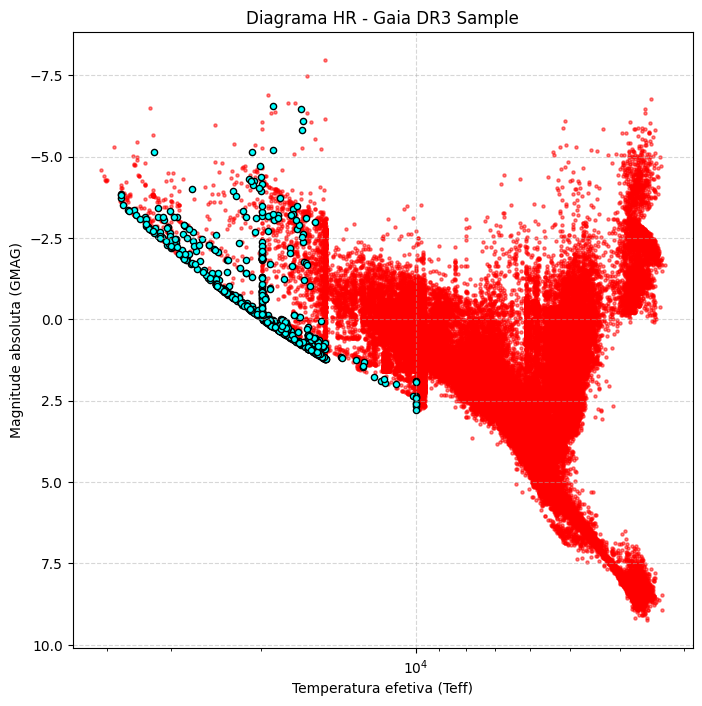

In [234]:
plt.figure(figsize=(8, 8))

plt.scatter(df_sample["Teff"], df_sample["GMAG"],
            s=5, color='red', alpha=0.5)

df_wa = df_sample[df_sample['PWD'] > 0.9]
plt.scatter(df_wa['Teff'], df_wa['GMAG'],
            s=20, c='cyan', edgecolor='black', label='Anãs brancas')

# Inversão dos eixos X e Y
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

# Escala logarítmica para a temperatura efetiva
plt.xscale('log')

plt.xlabel("Temperatura efetiva (Teff)")
plt.ylabel("Magnitude absoluta (GMAG)")
plt.title("Diagrama HR - Gaia DR3 Sample")

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

O parâmetro GMAG é obtido considerando a distância até a estrela. Para estrelas pequenas, como anãs brancas, o valor estimado pode ser mais baixo, pois o raio é pequeno, dando a impressão de que são mais luminosas.

O diagrama abaixo mostra que a métrica `Lum-Flame`, que representa a luminosidade em múltiplos da luminosidade solar, é mais adequada para identificar estrelas. As candidatas a anã branca, com probabilidade acima de 90%, estão marcadas em ciano. Parece haver ruído nas temperaturas efetivas mais altas, o que também ocorre para anãs brancas que parecem estar em cima da sequência principal.

Esse ruído elevado tem uma interpretação física. Para estrelas de altas temperaturas, incertezas na medição do raio causam grandes variações de luminosidade, pois ela é proporcional a $R^2T_{eff}^4$. Além disso, o aumento de emissão no espectro UV, que não é detectado pelo Gaia, faz com que haja mais incerteza sobre a luminosidade.

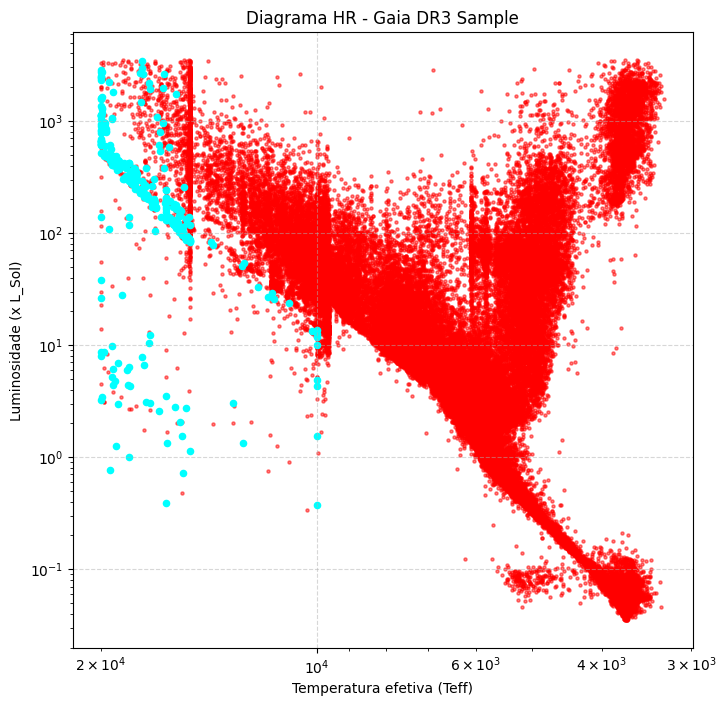

In [235]:
plt.figure(figsize=(8, 8))

plt.scatter(df_sample["Teff"], df_sample["Lum-Flame"],
            s=5, color='red', alpha=0.5)

df_wa = df_sample[df_sample['PWD'] > 0.9]
plt.scatter(df_wa['Teff'], df_wa['Lum-Flame'],
            s=20, c='cyan', label='Anãs brancas')

plt.gca().invert_xaxis()

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Temperatura efetiva (Teff)")
plt.ylabel("Luminosidade (x L_Sol)")
plt.title("Diagrama HR - Gaia DR3 Sample")

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

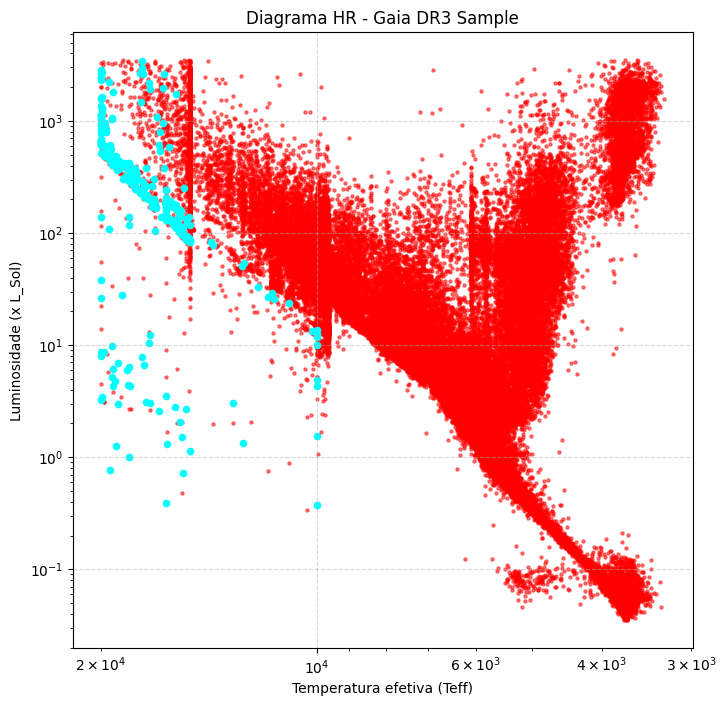

In [236]:
plt.figure(figsize=(8, 8))

df_estrelas = df_sample[df_sample['Pstar'] > 0.9]
plt.scatter(df_estrelas["Teff"], df_estrelas["Lum-Flame"],
            s=5, color='red', alpha=0.5)

df_wa = df_sample[df_sample['PWD'] > 0.9]
plt.scatter(df_wa['Teff'], df_wa['Lum-Flame'],
            s=20, c='cyan', label='Anãs brancas')

plt.gca().invert_xaxis()

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Temperatura efetiva (Teff)")
plt.ylabel("Luminosidade (x L_Sol)")
plt.title("Diagrama HR - Gaia DR3 Sample")

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()